In [1]:
!git clone https://git-ai.inet-th.net/suphanat.bo/kong_dataset_dogcat.git

Cloning into 'kong_dataset_dogcat'...
remote: Enumerating objects: 11362, done.
remote: Total 11362 (delta 0), reused 0 (delta 0), pack-reused 11362
Receiving objects: 100% (11362/11362), 263.82 MiB | 36.07 MiB/s, done.
Resolving deltas: 100% (3821/3821), done.
Updating files: 100% (11077/11077), done.


In [2]:
!pwd

/home/jovyan/Exercise


In [27]:
import torch

In [30]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
device

'cuda'

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

In [33]:
!pwd

/home/jovyan/Exercise


<class 'PIL.JpegImagePlugin.JpegImageFile'>


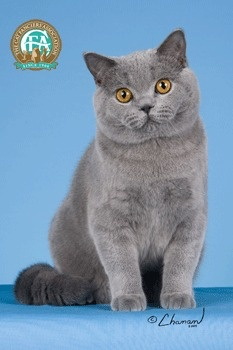

In [41]:
im = Image.open('kong_dataset_dogcat/images/Cats_Test0.jpg')
print(type(im))
im

(233, 350)


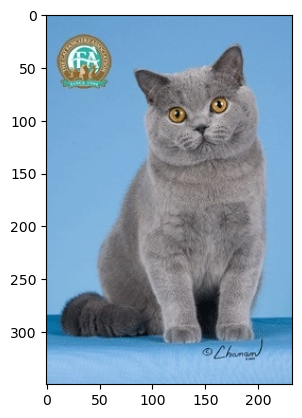

In [42]:
im = Image.open('kong_dataset_dogcat/images/Cats_Test0.jpg')
print(im.size)
plt.imshow(im)

In [46]:
df = pd.read_csv("kong_dataset_dogcat/data.csv")

df

,filename,width,height,xmin,ymin,xmax,ymax,label
0,Cats_Test3387.jpg,500,375,179,69,315,199,dog
1,Cats_Test3261.jpg,334,500,109,17,263,162,dog
2,Cats_Test1566.jpg,375,500,108,197,256,359,dog
3,Cats_Test2617.jpg,500,335,148,1,373,215,cat
4,Cats_Test3281.jpg,375,500,1,96,341,446,dog
...,...,...,...,...,...,...,...,...
3681,Cats_Test1683.jpg,500,375,227,24,359,156,cat
3682,Cats_Test3256.jpg,500,333,213,53,311,162,dog
3683,Cats_Test1778.jpg,333,500,36,74,166,211,cat
3684,Cats_Test932.jpg,479,500,33,44,415,396,dog


In [47]:
df.head()

,filename,width,height,xmin,ymin,xmax,ymax,label
0,Cats_Test3387.jpg,500,375,179,69,315,199,dog
1,Cats_Test3261.jpg,334,500,109,17,263,162,dog
2,Cats_Test1566.jpg,375,500,108,197,256,359,dog
3,Cats_Test2617.jpg,500,335,148,1,373,215,cat
4,Cats_Test3281.jpg,375,500,1,96,341,446,dog


In [48]:
df.tail()

,filename,width,height,xmin,ymin,xmax,ymax,label
3681,Cats_Test1683.jpg,500,375,227,24,359,156,cat
3682,Cats_Test3256.jpg,500,333,213,53,311,162,dog
3683,Cats_Test1778.jpg,333,500,36,74,166,211,cat
3684,Cats_Test932.jpg,479,500,33,44,415,396,dog
3685,Cats_Test323.jpg,500,391,75,26,215,167,dog


In [49]:
df.shape

(3686, 8)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3686 entries, 0 to 3685
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  3686 non-null   object
 1   width     3686 non-null   int64 
 2   height    3686 non-null   int64 
 3   xmin      3686 non-null   int64 
 4   ymin      3686 non-null   int64 
 5   xmax      3686 non-null   int64 
 6   ymax      3686 non-null   int64 
 7   label     3686 non-null   object
dtypes: int64(6), object(2)
memory usage: 230.5+ KB


In [51]:
df['filename']

0       Cats_Test3387.jpg
1       Cats_Test3261.jpg
2       Cats_Test1566.jpg
3       Cats_Test2617.jpg
4       Cats_Test3281.jpg
              ...        
3681    Cats_Test1683.jpg
3682    Cats_Test3256.jpg
3683    Cats_Test1778.jpg
3684     Cats_Test932.jpg
3685     Cats_Test323.jpg
Name: filename, Length: 3686, dtype: object

In [53]:
df.columns

Index(['filename', 'width', 'height', 'xmin', 'ymin', 'xmax', 'ymax', 'label'], dtype='object')

In [54]:
df['label'].value_counts()

label
dog    2498
cat    1188
Name: count, dtype: int64

In [55]:
df['ymax'].value_counts()

ymax
235    27
231    27
162    25
211    25
146    24
       ..
386     1
423     1
454     1
407     1
396     1
Name: count, Length: 381, dtype: int64

(500, 375)
dog


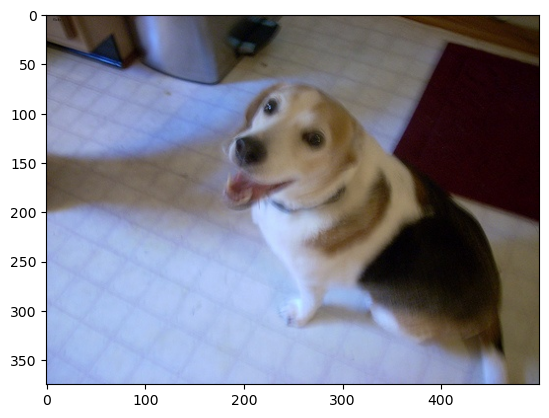

In [62]:
im = Image.open(f"kong_dataset_dogcat/images/{df['filename'][0]}")
plt.imshow(im)
print(im.size)
print(df['label'][0])
plt.imshow(im)

In [80]:
!pwd

/home/jovyan/Exercise/kong_dataset_dogcat


In [83]:
from set_pytorch.classification.load_dataset import LoadDataset

In [84]:
custom_data = LoadDataset(img_path = 'images/', dataframe = df, x_col = "filename", y_col = "label")

In [85]:
len(custom_data)

3686

In [86]:
custom_data.get_dataframe()

,filename,width,height,xmin,ymin,xmax,ymax,label
0,Cats_Test3387.jpg,500,375,179,69,315,199,dog
1,Cats_Test3261.jpg,334,500,109,17,263,162,dog
2,Cats_Test1566.jpg,375,500,108,197,256,359,dog
3,Cats_Test2617.jpg,500,335,148,1,373,215,cat
4,Cats_Test3281.jpg,375,500,1,96,341,446,dog
...,...,...,...,...,...,...,...,...
3681,Cats_Test1683.jpg,500,375,227,24,359,156,cat
3682,Cats_Test3256.jpg,500,333,213,53,311,162,dog
3683,Cats_Test1778.jpg,333,500,36,74,166,211,cat
3684,Cats_Test932.jpg,479,500,33,44,415,396,dog


In [88]:
custom_data.label_

{'cat': 0, 'dog': 1}

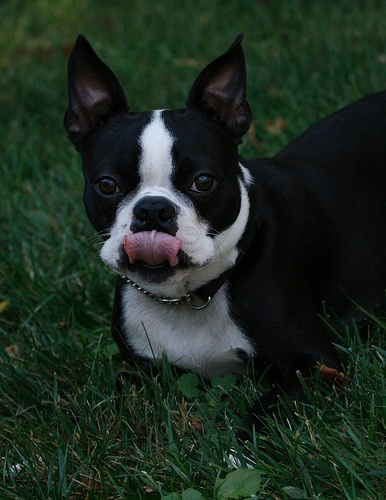

In [94]:
custom_data.get_value(100)

In [95]:
custom_data.get_value(100).size

(386, 500)

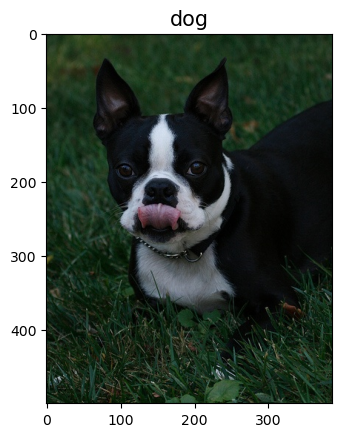

In [96]:
i=100
custom_data.plot_image(i)

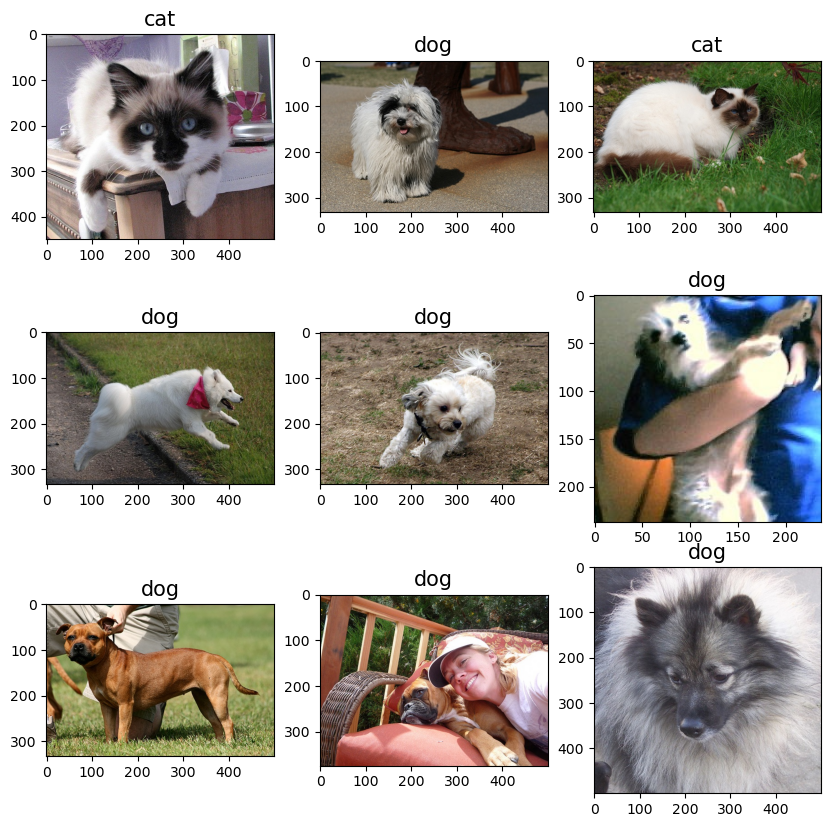

In [97]:
custom_data.multi_plot_image()

In [107]:
import  torchvision.transforms as transforms

In [108]:
transform = transforms.Compose([transforms.Resize((224, 224)),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean = (0.5, 0.5, 0.5), std= (0.5, 0.5, 0.5))])

In [111]:
type(custom_data.get_value(0))

torch.Tensor

In [109]:
custom_data = LoadDataset(img_path='images/', dataframe=df, x_col='filename', y_col='label', transform=transform)

In [113]:
custom_data.get_value(0)

tensor([[[-0.2627, -0.2706, -0.2863,  ..., -0.4196, -0.4118, -0.4196],
         [-0.2627, -0.2706, -0.2627,  ..., -0.4118, -0.4196, -0.4196],
         [-0.2627, -0.2627, -0.2784,  ..., -0.4039, -0.4118, -0.4196],
         ...,
         [ 0.1451,  0.1451,  0.1529,  ..., -0.1294, -0.1137, -0.1137],
         [ 0.1451,  0.1529,  0.1451,  ..., -0.0980, -0.1059, -0.1137],
         [ 0.1451,  0.1373,  0.1294,  ..., -0.0745, -0.0980, -0.1137]],

        [[-0.4039, -0.4039, -0.4039,  ..., -0.5294, -0.5216, -0.5294],
         [-0.3804, -0.3804, -0.3647,  ..., -0.5137, -0.5137, -0.5216],
         [-0.3647, -0.3569, -0.3569,  ..., -0.4902, -0.4980, -0.5059],
         ...,
         [ 0.3098,  0.3098,  0.3255,  ..., -0.1373, -0.0980, -0.0902],
         [ 0.3020,  0.3176,  0.3255,  ..., -0.1059, -0.0980, -0.0902],
         [ 0.3020,  0.2941,  0.3098,  ..., -0.0824, -0.0824, -0.0902]],

        [[-0.4275, -0.4353, -0.4353,  ..., -0.6314, -0.6314, -0.6078],
         [-0.4118, -0.4275, -0.4039,  ..., -0

In [114]:
custom_data.get_value(0).shape

torch.Size([3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


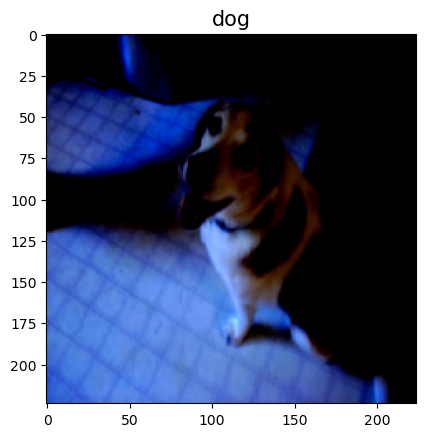

In [120]:
custom_data.plot_image(0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


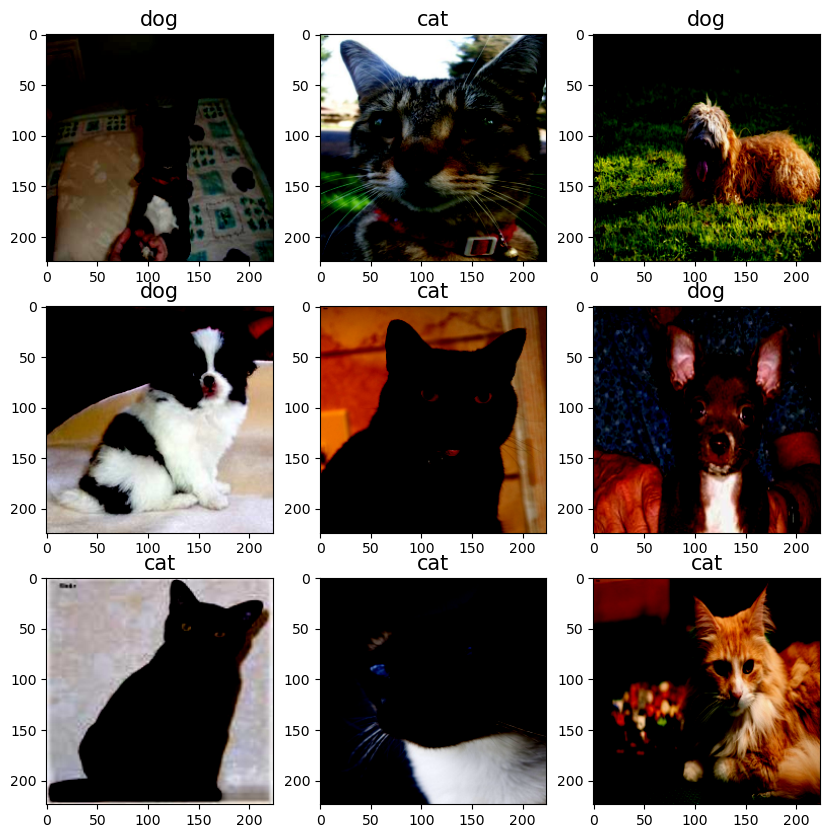

In [122]:
custom_data.multi_plot_image()

In [128]:
train_ = LoadDataset(img_path='images/', dataframe=df, x_col='filename', y_col='label', transform=transform, subset='train', split=(0.8,0.2,0.1))
test_ = LoadDataset(img_path='images/', dataframe=df, x_col='filename', y_col='label', transform=transform, subset='test', split=(0.7,0.2,0.1))
val_ = LoadDataset(img_path='images/', dataframe=df, x_col='filename', y_col='label', transform=transform, subset='valid', split=(0.7,0.2,0.1))

In [127]:
print(len(custom_data))
print(len(train_))
print(len(test_))
print(len(val_))

3686
2653
738
295


In [130]:
 train_.get_dataframe()

,filename,width,height,xmin,ymin,xmax,ymax,label
0,Cats_Test17.jpg,500,375,160,176,456,357,dog
1,Cats_Test351.jpg,425,500,148,145,394,412,cat
2,Cats_Test663.jpg,500,367,189,36,286,142,cat
3,Cats_Test1419.jpg,276,400,38,63,108,147,cat
4,Cats_Test1506.jpg,500,281,157,46,304,181,dog
...,...,...,...,...,...,...,...,...
2648,Cats_Test2047.jpg,375,500,49,35,317,320,cat
2649,Cats_Test2654.jpg,500,375,91,6,438,350,dog
2650,Cats_Test2600.jpg,300,183,168,1,281,151,dog
2651,Cats_Test1461.jpg,500,375,172,5,395,231,dog


In [131]:
from torch.utils.data import DataLoader

In [133]:
train_ = LoadDataset(img_path='images/', dataframe=df, x_col='filename', y_col='label', transform=transform, subset='train', split=(0.7,0.2,0.1))
train_loader = DataLoader(dataset=train_, shuffle=True, batch_size=32)

val_ = LoadDataset(img_path='images/', dataframe=df, x_col='filename', y_col='label', transform=transform, subset='valid', split=(0.7,0.2,0.1))
validation_loader = DataLoader(dataset=val_, shuffle=True, batch_size=32)

In [134]:
print(len(train_))
print(len(val_))

2653
295


In [135]:
print(len(train_loader))
print(len(validation_loader))

83
10


In [19]:
from set_pytorch.classification.load_model import Model
from set_pytorch.classification.load_model import cal_shape

ModuleNotFoundError: No module named 'set_pytorch'

In [20]:
import torch.nn as nn



class Cnn(nn.Module):
    def __init__(self,shape,numChannels,n_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=numChannels, out_channels=32,kernel_size=(3, 3))
        shape,out = cal_shape(shape,self.conv1)
        print(shape,out)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        shape,out = cal_shape(shape,self.conv1,self.pool)
        print(shape,out)


        self.conv2 = nn.Conv2d(in_channels=out, out_channels=64,kernel_size=(3, 3))
        shape,out = cal_shape(shape,self.conv2)
        print(shape,out)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        shape,out = cal_shape(shape,self.conv2,self.pool)
        print(shape,out)

        self.conv3 = nn.Conv2d(in_channels=out, out_channels=128,kernel_size=(3, 3))
        shape,out = cal_shape(shape,self.conv3)
        print(shape,out)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        shape,out = cal_shape(shape,self.conv3,self.pool)
        print(shape,out)


        self.fc1 = nn.Linear(in_features=shape[0]*shape[1]*out, out_features=256)
        self.relu = nn.ReLU()
        out = self.fc1.out_features
        print(out)

        self.fc2 = nn.Linear(in_features=out, out_features=n_classes )
        self.logSoftmax = nn.LogSoftmax(dim=1)



    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        output = self.logSoftmax(x)
        return output




In [21]:
model = Model(Cnn,shape=224,numChannels=3,n_classes=custom_data.label_,device=device)

NameError: name 'Model' is not defined

In [18]:
model.summary()

NameError: name 'model' is not defined

In [164]:
model.fit(train_loader,validation_loader,epochs=10)

 10%|█         | 1/10 [01:15<11:17, 75.26s/it]

[INFO] EPOCH: 1/10
Train loss: 0.645677, Train accuracy: 0.6653
Val loss: 0.754719, Val accuracy: 0.6780



 20%|██        | 2/10 [02:19<09:11, 68.97s/it]

[INFO] EPOCH: 2/10
Train loss: 0.594697, Train accuracy: 0.6890
Val loss: 0.673386, Val accuracy: 0.6814



 30%|███       | 3/10 [03:24<07:49, 67.12s/it]

[INFO] EPOCH: 3/10
Train loss: 0.509803, Train accuracy: 0.7524
Val loss: 0.863699, Val accuracy: 0.6881



 40%|████      | 4/10 [04:28<06:34, 65.69s/it]

[INFO] EPOCH: 4/10
Train loss: 0.427130, Train accuracy: 0.8108
Val loss: 0.679634, Val accuracy: 0.6847



 50%|█████     | 5/10 [05:33<05:27, 65.59s/it]

[INFO] EPOCH: 5/10
Train loss: 0.323203, Train accuracy: 0.8613
Val loss: 0.888427, Val accuracy: 0.6678



 60%|██████    | 6/10 [06:38<04:21, 65.26s/it]

[INFO] EPOCH: 6/10
Train loss: 0.216701, Train accuracy: 0.9126
Val loss: 1.103626, Val accuracy: 0.6407



 70%|███████   | 7/10 [07:40<03:13, 64.35s/it]

[INFO] EPOCH: 7/10
Train loss: 0.101226, Train accuracy: 0.9623
Val loss: 1.654690, Val accuracy: 0.6441



 80%|████████  | 8/10 [08:43<02:07, 63.82s/it]

[INFO] EPOCH: 8/10
Train loss: 0.066545, Train accuracy: 0.9774
Val loss: 1.637599, Val accuracy: 0.6441



 90%|█████████ | 9/10 [09:48<01:04, 64.22s/it]

[INFO] EPOCH: 9/10
Train loss: 0.057928, Train accuracy: 0.9781
Val loss: 1.925471, Val accuracy: 0.6780



100%|██████████| 10/10 [10:50<00:00, 65.08s/it]

[INFO] EPOCH: 10/10
Train loss: 0.024027, Train accuracy: 0.9921
Val loss: 2.292065, Val accuracy: 0.6780



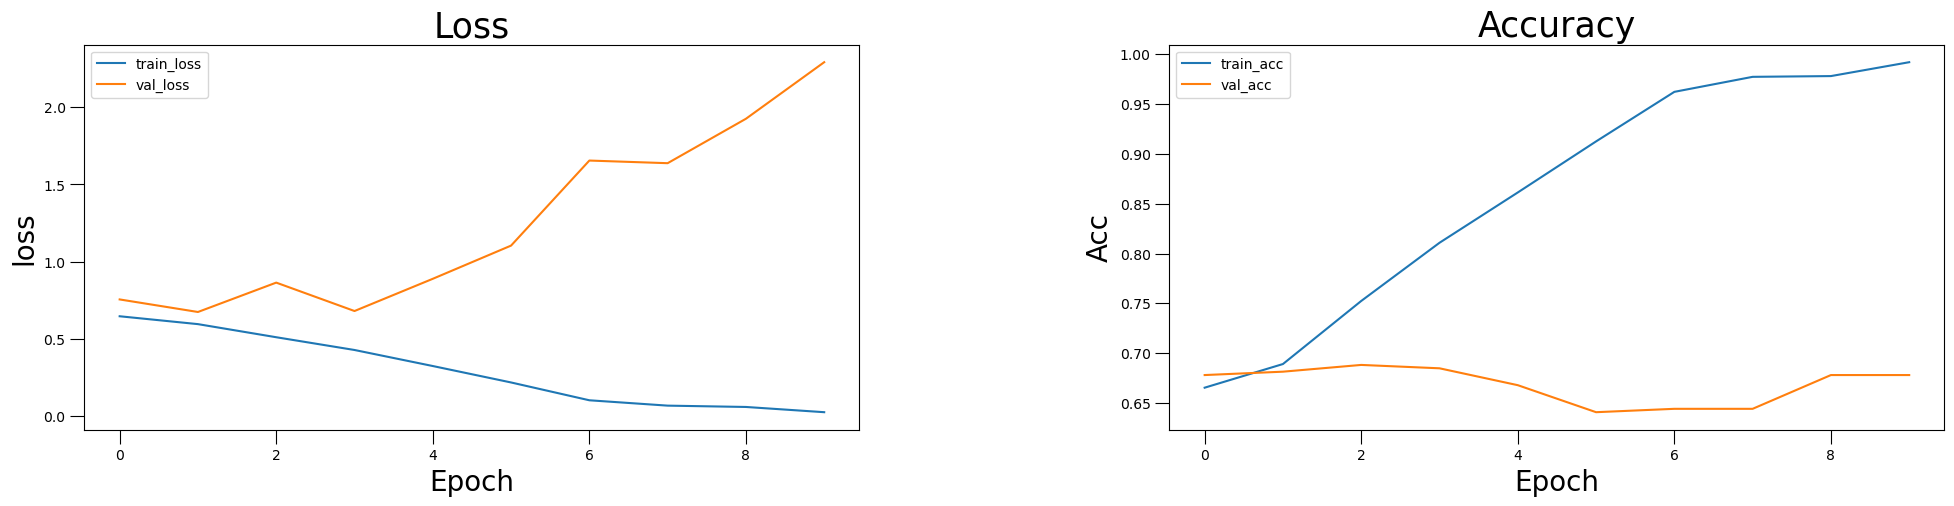

In [165]:
model.plot_ep()

In [166]:
test_ = LoadDataset(img_path='images/', dataframe=df, x_col='filename', y_col='label', transform=transform, subset='test', split=(0.7,0.2,0.1))
test_loader = DataLoader(dataset=train_, shuffle=False, batch_size=1)

In [167]:
y_test,y_pred = model.predict_testset(test_loader)

100%|██████████| 2653/2653 [01:11<00:00, 37.06it/s]


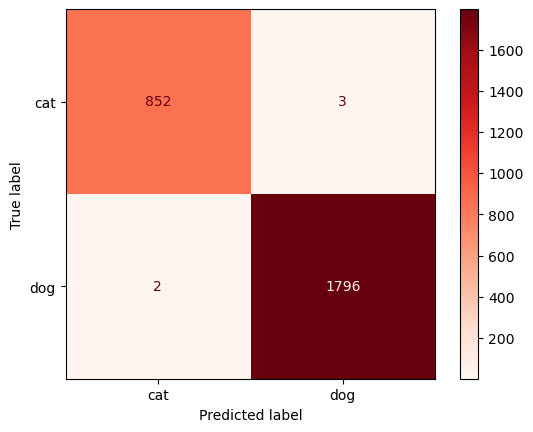

In [168]:
model.Confusion_Matrix(y_test,y_pred)

In [169]:
model.Classification_Report(y_test,y_pred)

              precision    recall  f1-score   support

         cat       1.00      1.00      1.00       855
         dog       1.00      1.00      1.00      1798

    accuracy                           1.00      2653
   macro avg       1.00      1.00      1.00      2653
weighted avg       1.00      1.00      1.00      2653

